In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

plt.style.use(['science', 'notebook', 'grid'])


In [3]:
#Tensão de fundo do sensor

V_fundo = -7.5 *1e-3
V_fundo_err = 0.2 *1e-3

In [4]:
#Dados

I_mA = np.array([24.9, 51.7, 102.2, 148.8, 197.8]) *1e-3
V_mA = np.array([34.8, 79.9, 164.7]) *1e-3

I_mA_err = np.repeat(0.1 * 1e-3, repeats=len(I_mA))
V_mA_err =  np.repeat(0.1 * 1e-3, repeats=len(V_mA))

I_A = np.array([0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.80, 1.0, 1.20, 1.40, 1.60, 1.80, 2.00])
V_A = np.array([0.241,0.324,0.436,0.524,0.611,0.692,0.777,0.875,0.948,1.046,1.386, 1.746, 2.08, 2.43, 2.46, 2.46, 2.46])

I_A_err = np.repeat(0.01, repeats=len(I_A))
V_A_err =  np.repeat(0.001 , repeats=len(V_A))

I = np.concatenate((I_mA,I_A))
V = np.concatenate((V_mA, V_A))

I_err = np.concatenate((I_mA_err, I_A_err))
V_err = np.concatenate((V_mA_err, V_A_err))

#Correção do campo de fundo
V = V - V_fundo
V_err = V_err + V_fundo_err

In [5]:
#ajuste Linear

def func(x_data,a, b):
    return a*x_data + b

popt, pcov = curve_fit(func, I[:-3], V[:-3])
a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))
r2 = r2_score(V[:-3], func(I[:-3], *popt))
print('a = ', a)
print('b = ', b)
print(r'r^2 =', r2)
print('a_err = ', a_err)
print('b_err = ', b_err)

a_exp = a
a_exp_err = a_err

a =  1.7457717395037404
b =  -0.0006675308902666099
r^2 = 0.9998927698878697
a_err =  0.004667878401465811
b_err =  0.0029227918469910646


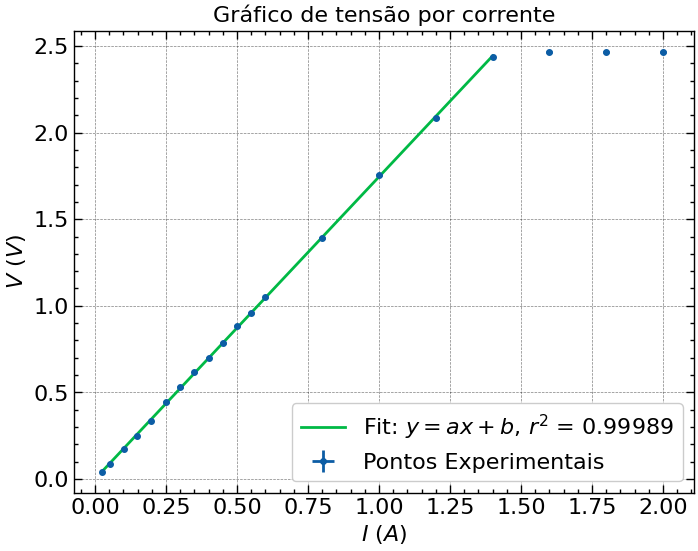

In [6]:
plt.errorbar(I, V, xerr=I_err, yerr=V_err, marker = 'o',ms = 4, ls = '', label = 'Pontos Experimentais')
plt.plot(I[:-3], func(I[:-3],a,b) , label= r'Fit: $y = ax + b$, $r^2$ = %.5f' % (r2))

plt.xlabel("$I \ (A)$")
plt.ylabel("$V \ (V)$")
plt.title("Gráfico de tensão por corrente")

plt.legend()

In [7]:
#Modelo Teórico
#B = aV

mu = 4*np.pi *1e-7

N = 760

L = 14.80 *1e-2
L_err = 0.05*1e-2

R = (3.9 + 6.9)/4 * 1e-2
R_err = 0.03 * 1e-2 

n = N/L
n_err = N/(L**2) * L_err

eta = R/L
eta_err = R_err/L + R/L**2 *L_err

a = mu*n/2 * (1/np.sqrt(1/4 + eta**2))
a_err = mu/2 * (1/np.sqrt(1/4 + eta**2)) * n_err + mu*n/4 * (1/4 + eta**2)**(-3/2) * 2*eta *eta_err

print(f"a = {a} +- {a_err}")

a = 0.006062092623464797 +- 3.0799607729775515e-05


In [8]:
#B = a/a_exp * V
A = a/a_exp #Fator de conversão
A_err = a_err/a_exp + a/(a_exp**2) * a_exp_err

print(f"A = {A} +- {A_err}")

A = 0.003472442866550257 +- 2.6927087730399573e-05
